In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package')

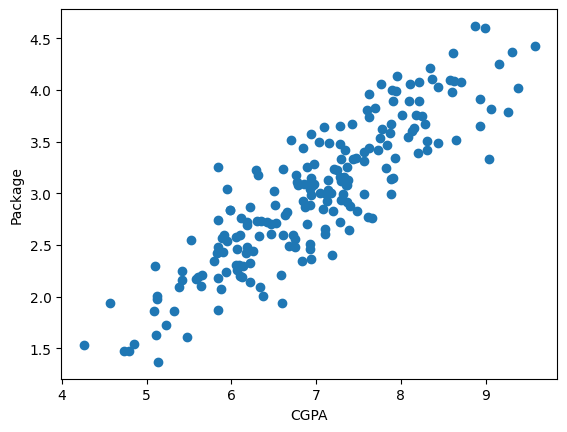

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package")

In [6]:
X=df.iloc[:,0:1]
Y=df.iloc[:,-1]

In [8]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr=LinearRegression()

In [12]:
lr.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0, 0.5, 'Packages in lpa')

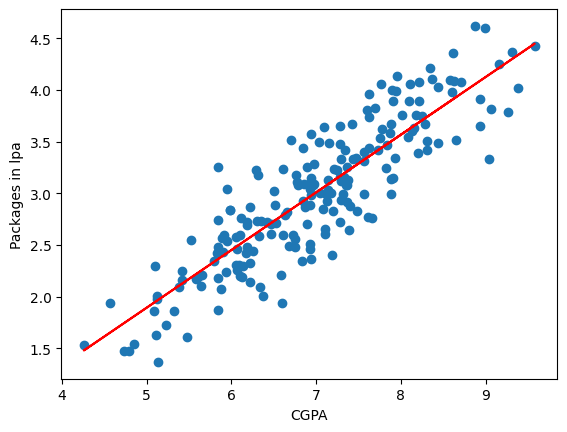

In [14]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Packages in lpa')

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [18]:
Y_pred=lr.predict(X_test)

In [20]:
print("MAE",mean_absolute_error(Y_test,Y_pred))

MAE 0.2884710931878175


In [21]:
print("MSE",mean_squared_error(Y_test,Y_pred))

MSE 0.12129235313495527


In [22]:
print("RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))

RMSE 0.34827051717731616


In [23]:
print("R2Score",r2_score(Y_test,Y_pred))

R2Score 0.780730147510384


In [24]:
#adjusted R2 score
r2=r2_score(Y_test,Y_pred)

In [25]:
X_test.shape

(40, 1)

In [26]:
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [27]:
new_df1=df.copy()
new_df1['random_feature']=np.random.random(200)
new_df1=new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.920736,3.26
1,5.12,0.220036,1.98
2,7.82,0.407433,3.25
3,7.42,0.997800,3.67
4,6.94,0.767830,3.57


In [33]:
X=new_df1.iloc[:,0:2]
Y=new_df1.iloc[:,-1]

In [34]:
X

,cgpa,random_feature
0,6.89,0.920736
1,5.12,0.220036
2,7.82,0.407433
3,7.42,0.997800
4,6.94,0.767830
...,...,...
195,6.93,0.329600
196,5.89,0.514908
197,7.21,0.167540
198,7.63,0.763248


In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [36]:
X_train

,cgpa,random_feature
137,7.14,0.956154
163,8.93,0.162911
111,5.42,0.642439
123,5.10,0.174592
109,7.77,0.974570
...,...,...
43,7.66,0.303465
22,6.14,0.080842
72,7.78,0.549292
15,7.25,0.828828


In [46]:
X_test.shape

(40, 2)

In [40]:
lr2=LinearRegression()

In [41]:
lr2.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
Y_pred=lr2.predict(X_test)

In [44]:
r2=r2_score(Y_test,Y_pred)

In [45]:
r2

0.7853449573163594

In [48]:
#absolute r2_score
1-(((1-r2)*(40-2))/(40-1-2))

0.7795434696762611